In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
import squarify
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Read in Data

In [37]:
df = pd.read_excel('/Users/linhle/Downloads/Final Assignment - Week 9.xlsx').drop(columns = ['Unnamed: 66','Unnamed: 67','Dear Greg,'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

# EDA

### 1. Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

In [7]:
df.describe()

id      logtarg             r             f              m  \
count  3.371300e+04  8311.000000  33713.000000  33713.000000   33713.000000   
mean   8.234209e+06     0.130050    508.427254      5.820603     251.924325   
std    4.426015e+06     0.659962    542.440039      7.008049    3929.929826   
min    9.140000e+02     0.000000      0.000000      0.000000       0.000000   
25%    4.391616e+06     0.000000    117.000000      1.000000      39.899994   
50%    7.967691e+06     0.000000    293.000000      3.000000     102.629944   
75%    1.199823e+07     0.000000    712.000000      7.000000     247.297485   
max    1.625264e+07     6.082878   2460.000000    118.000000  532892.000000   

                tof     Ffiction1    Fclassics3    Fcartoons5     Flegends6  \
count  33713.000000  33713.000000  33713.000000  33713.000000  33713.000000   
mean    1296.088186      0.590900      0.228102      0.356480      0.104767   
std      818.976321      1.762201      0.865510      1.105653      0.527764   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      536.000000      0.000000      0.000000      0.000000      0.000000   
50%     1311.000000      0.000000      0.000000      0.000000      0.000000   
75%     2132.000000      1.000000      0.000000      0.000000      0.000000   
max     2462.000000    109.000000     29.000000     49.000000     22.000000   

       ...      Mhealth35    Mcooking36    Mlearning37  MGamesRiddles38  \
count  ...   33713.000000  33713.000000   33713.000000     33713.000000   
mean   ...      29.095301      4.223431      21.147507         0.305226   
std    ...    2087.221131     19.975164    2898.452008         1.991675   
min    ...       0.000000      0.000000       0.000000         0.000000   
25%    ...       0.000000      0.000000       0.000000         0.000000   
50%    ...       0.000000      0.000000       0.000000         0.000000   
75%    ...      18.899994      0.000000       2.500000         0.000000   
max    ...  383154.500000    820.563477  532182.000000        78.724670   

          Msports39      Mhobby40     Mnature41  Mencyclopaedia44  \
count  33713.000000  33713.000000  33713.000000      33713.000000   
mean       0.020681      6.785558      3.728635          8.402428   
std        0.501499     21.197488     15.007592         46.021881   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      5.112919      0.000000          0.000000   
max       21.448685    771.610840    735.354980       1999.150391   

          Mvideos50   Mnonbooks99  
count  33713.000000  33713.000000  
mean       6.020431      1.800973  
std       19.643978     21.383867  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      794.137695   2412.960938  

[8 rows x 66 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

In [10]:
df.id.nunique()

33713

There are 33,713 aggregated records (each record is a unique customer) in this dataset. 

r = recency, smaller number is most recent

f = frequency, higher number is more shopped

m = monetary, more $ spent

tof = time on file, higher number is longer customer

F_ are count variables

M_ are amount in $$ 

In [13]:
df.isnull().sum()

id                      0
logtarg             25402
r                       0
f                       0
m                       0
tof                     0
Ffiction1               0
Fclassics3              0
Fcartoons5              0
Flegends6               0
Fphilosophy7            0
Freligion8              0
Fpsychology9            0
Flinguistics10          0
Fart12                  0
Fmusic14                0
Ffacsimile17            0
Fhistory19              0
Fconthist20             0
Feconomy21              0
Fpolitics22             0
Fscience23              0
Fcompsci26              0
Frailroads27            0
Fmaps30                 0
Ftravelguides31         0
Fhealth35               0
Fcooking36              0
Flearning37             0
FGamesRiddles38         0
Fsports39               0
Fhobby40                0
Fnature41               0
Fencyclopaedia44        0
Fvideos50               0
Fnonbooks99             0
Mfiction1               0
Mclassics3              0
Mcartoons5  

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'logtarg'}>,
        <AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'f'}>,
        <AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'tof'}>,
        <AxesSubplot:title={'center':'Ffiction1'}>,
        <AxesSubplot:title={'center':'Fclassics3'}>],
       [<AxesSubplot:title={'center':'Fcartoons5'}>,
        <AxesSubplot:title={'center':'Flegends6'}>,
        <AxesSubplot:title={'center':'Fphilosophy7'}>,
        <AxesSubplot:title={'center':'Freligion8'}>,
        <AxesSubplot:title={'center':'Fpsychology9'}>,
        <AxesSubplot:title={'center':'Flinguistics10'}>,
        <AxesSubplot:title={'center':'Fart12'}>,
        <AxesSubplot:title={'center':'Fmusic14'}>],
       [<AxesSubplot:title={'center':'Ffacsimile17'}>,
        <AxesSubplot:title={'center':'Fhistory19'}>,
        <AxesSubplot:title={'center':'Fconthist20'}>,
        <AxesSubplot:title={'cent

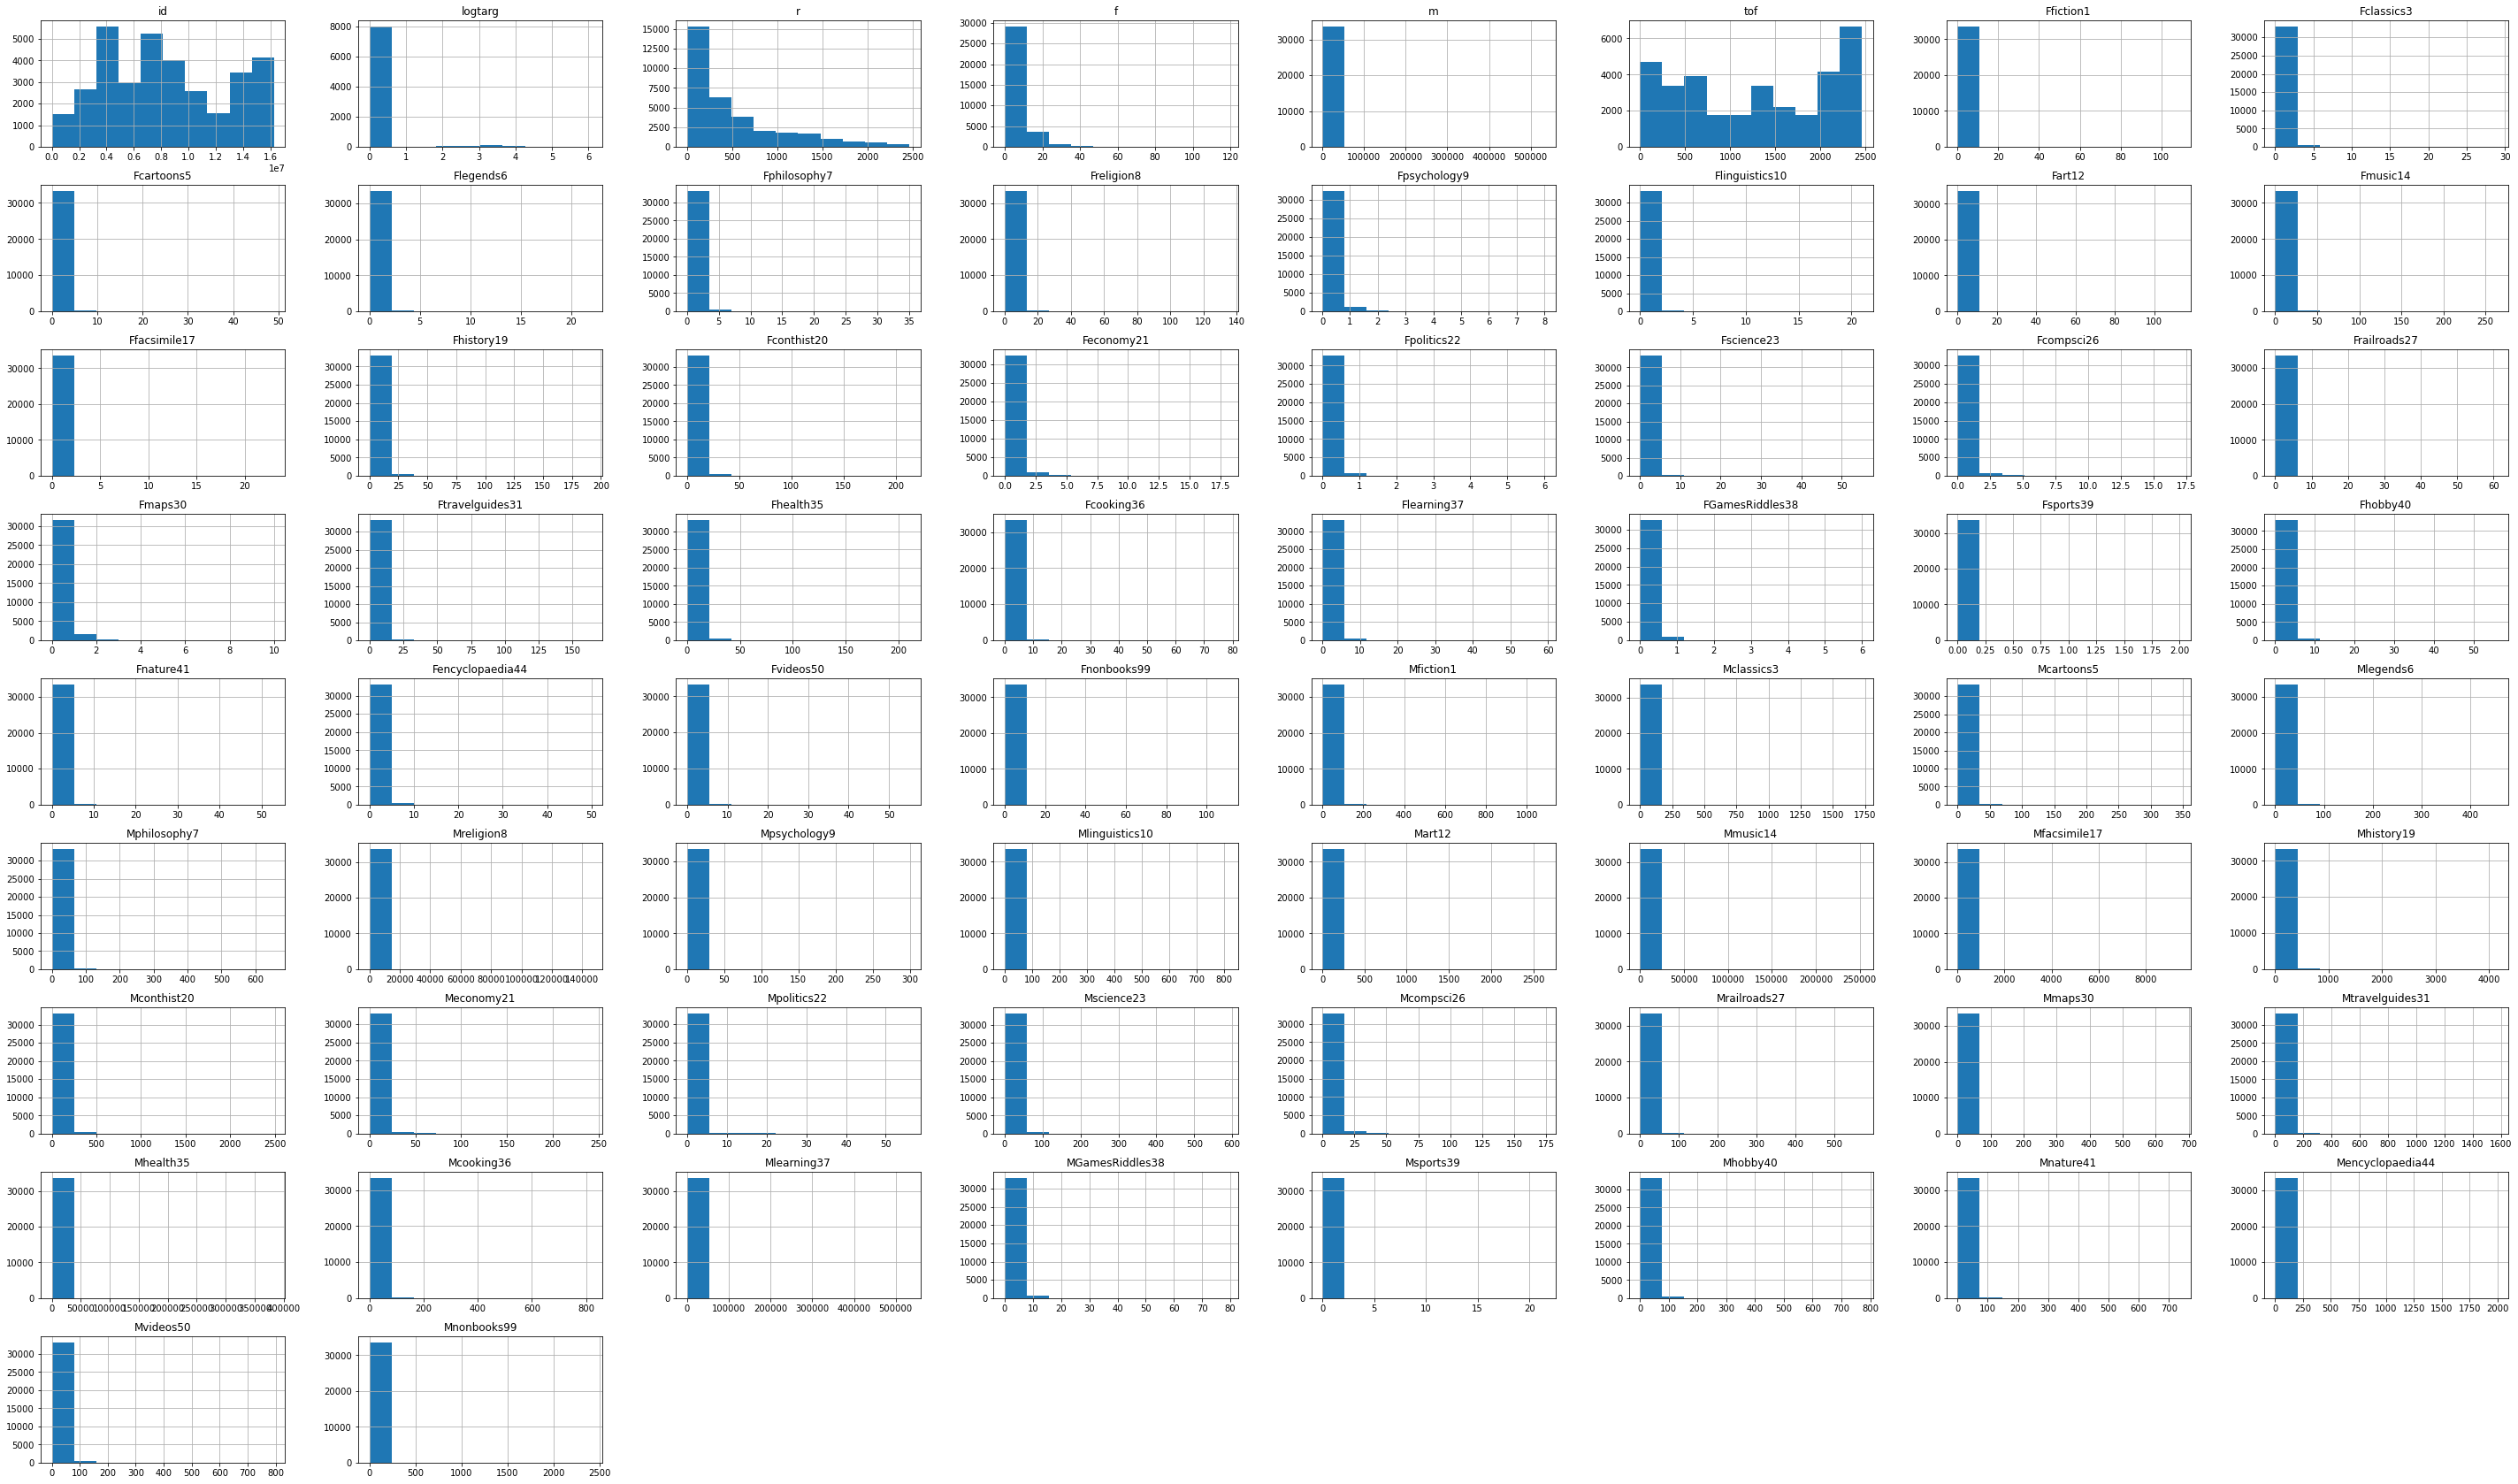

In [17]:
df.hist(figsize=(50,30))

array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'f'}>],
       [<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'tof'}>]], dtype=object)

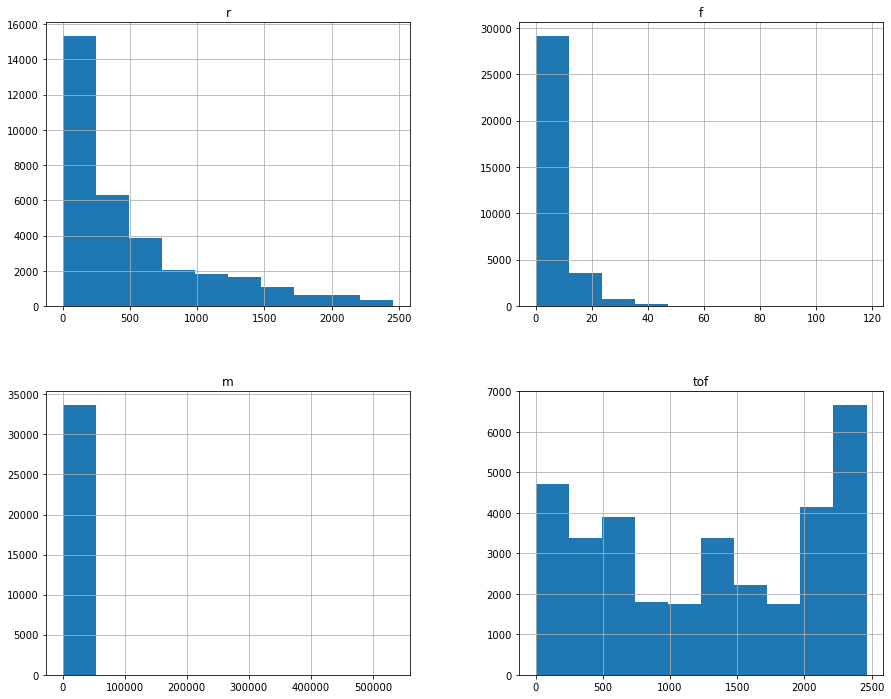

In [19]:
df[['r','f','m','tof']].hist(figsize=(15,12))

### 2. Create a new data set with more descriptive labels and the data needed for analysis

In [38]:
#Remove outliers
def remove_outliers(df, columns):
    int_df = df
    for x in int_df[columns]:
        int_df = int_df[int_df[x] < df[x].quantile(0.99)]
    return int_df
df = remove_outliers(df, ['r','f','m'])

In [39]:
#Rename data columns to be more descriptive 
col = list(df.columns)
def relabel_data(col):
    for i in range(len(col)):
        if col[i] == 'r':
            col[i] = 'recency'
        elif col[i] == 'f':
            col[i] = 'overall frequency'
        elif  col[i] == 'm':
            col[i] = 'overall monetary'
        elif  col[i] == 'tof':
            col[i] = 'time on file in days'
        elif  col[i][0] == 'F':
            col[i] = 'frequency ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
        elif  col[i][0] == 'M':
            col[i] = 'monetary ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])

    return col
            
df.columns = relabel_data(col)  

In [40]:
#Drop unnecessary column
df = df.drop(columns = ['logtarg'])

In [41]:
# Remove spaces
df.columns = df.columns.str.replace(' ', '_')
# Lowercase columns
df.columns = df.columns.str.lower()

In [42]:
df.head()

id  recency  overall_frequency  overall_monetary  time_on_file_in_days  \
0   914      194                  7        318.894775                  1703   
1   957        3                 14        368.052246                  2364   
2  1406     1489                 15        423.298340                  2371   
3  1414      155                  4         71.217041                  1290   
4  1546      194                  6        442.638184                  2188   

   frequency_fiction_books  frequency_classics_books  \
0                        1                         0   
1                        1                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   frequency_cartoons_books  frequency_legends_books  \
0                         1                        0   
1                         2                        0   
2                         0                        0   
3                         0                        0   
4                         1                        0   

   frequency_philosophy_books  frequency_religion_books  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           3                         1   

   frequency_psychology_books  frequency_linguistics_books  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            1   

   frequency_art_books  frequency_music_books  frequency_facsimile_books  \
0                    1                      7                          0   
1                    0                      4                          0   
2                    0                      0                          0   
3                    0                      0                          0   
4                    1                      3                          0   

   frequency_history_books  frequency_conthist_books  frequency_economy_books  \
0                        0                        17                        0   
1                        4                         4                        0   
2                        1                        34                        0   
3                        0                         7                        0   
4                        6                         7                        1   

   frequency_politics_books  frequency_science_books  frequency_compsci_books  \
0                         0                        0                        0   
1                         0                        0                        1   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        2                        0   

   frequency_railroads_books  frequency_maps_books  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          2                     0   

   frequency_travelguides_books  frequency_health_books  \
0                             2                       2   
1                             0                       7   
2                             0                       0   
3                             0                       0   
4                             1                       3   

   frequency_cook

In [43]:
df.isnull().sum()

id                               0
recency                          0
overall_frequency                0
overall_monetary                 0
time_on_file_in_days             0
frequency_fiction_books          0
frequency_classics_books         0
frequency_cartoons_books         0
frequency_legends_books          0
frequency_philosophy_books       0
frequency_religion_books         0
frequency_psychology_books       0
frequency_linguistics_books      0
frequency_art_books              0
frequency_music_books            0
frequency_facsimile_books        0
frequency_history_books          0
frequency_conthist_books         0
frequency_economy_books          0
frequency_politics_books         0
frequency_science_books          0
frequency_compsci_books          0
frequency_railroads_books        0
frequency_maps_books             0
frequency_travelguides_books     0
frequency_health_books           0
frequency_cooking_books          0
frequency_learning_books         0
frequency_gamesriddl

### 3. Document the problem you will address using the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver

**Specific:**
* Increase the revenue generated the company's Recommendation Engine, an AI solution for a Website using an Unsupervised segmentation/clustering approach
* The recommendation engine will personalize promotions for different segments of customers, so that we could spend our budgets most efficiently
* The goal revenue increase is 10% within six months
* We will increase the revenue by improving models based on feedbacks from data and by having a quicker turnover time when improving models (from 3 sprints to 2 sprints)

**Measurable**
* We expect to have the most improvement within the first two months, 3% each, and 1% for the following four months
* There are some metrics that we need to closely monitor as to not let them drop while improving our revenue: monthly active user and average revenue per customer per month

**Actionable**
* We will conduct A/B testing for our recommendation engine to measure the effect of the engine to our targeted customers

**Relevant**
These abovementioned goals are relevant because they:
* Give a clear definition of what an economic impact is
* Are in a reasonable timeframe for any data product development
* Give a metrics of what the data team could be evaluated upon


**Timebound**
* Our overall goal is over six months, which gives us the opportunity to conduct at least six A/B tests
* Furthermore, our timeline is broken down to monthly goal for ease of tracking and continuous feedback


### 4. Select from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO.

The following roles would be a part of the core team: 
* Customer Satisfaction Manager: To bring some background into how the ecom website knows whether or not the customer is satisfied
* Marketing Manager: To compare the proposed strategy to the current one
* Sr. Data Scientist: To develop a new model for recommendation
* VP Finance: To develop an economic impact analysis of the solution, as well as planning all the necessary financial resources needed to make such impact
* SVP Data Scientist: To represent the data science team and bring any more ideas to the table
* Customer Research Analyst: Similar to Customer Satisfaction Manager, to bring additional details to customer behavior and what may be relevant

### 5. Describe the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.

In my opinion, this project needs Marketing, Finance and Data Science expertise, which reflects in the chosen core team's expertise. It is a marketing project because it involves sending out promotions, targeting customers, and retaining customers. It involves finance because as per any data science consulting project, we need to be conscious of our budgets, in both human resources-wise and actual marketing budgets-wise. And lastly, it is still a data science project, which requires data science expertise for model building and deployment. In addition, I picked a customer satisfaction manager and customer research analyst to be in the core team to make use of their knowledge of our ecom customers - a domain that is only newly bloomed. I believe that the synergy of our team's knowledge will help make our solution comprehensive and effective, and thus make this project a success.

###  6. Choose either a “supervised” or an “unsupervised” approach to segment/cluster current customers using the data provided.

For this problem, I will be using the RFM approach, which is an unsupervised approach.

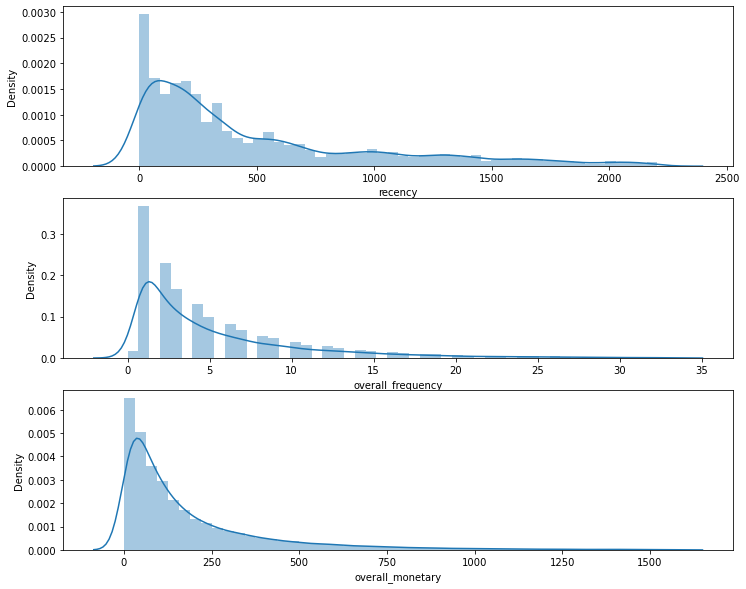

In [47]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['overall_frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['overall_monetary'])
# Show the plot
plt.show()

In [49]:
# --Calculate R, F and M groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df['recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df['overall_frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df_process = df.assign(R = r_groups.values, F = f_groups.values)
# Create labels for MonetaryValue
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df['overall_monetary'], q=4, labels=m_labels)
# Create new column M
df_process = df_process.assign(M = m_groups.values)

In [51]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_process['RFM_Segment_Concat'] = df_process.apply(join_rfm, axis=1)
rfm = df_process[['recency','overall_frequency','overall_monetary',
                 'time_on_file_in_days','R','F','M','RFM_Segment_Concat']]
rfm.head()

recency  overall_frequency  overall_monetary  time_on_file_in_days  R  F  \
0      194                  7        318.894775                  1703  3  3   
1        3                 14        368.052246                  2364  4  4   
2     1489                 15        423.298340                  2371  1  4   
3      155                  4         71.217041                  1290  3  3   
4      194                  6        442.638184                  2188  3  3   

   M RFM_Segment_Concat  
0  4                334  
1  4                444  
2  4                144  
3  2                332  
4  4                334

In [52]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

61


61 is way too many segments to be properly targeted individually. Thus, I will calculate a RFM score, that takes into account each Recency, Frequency and Monetary score, but only outputs one score per customer. The higher the score, the more loyal the users are to the website.

In [53]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

0    10
1    12
2     9
3     8
4    10
Name: RFM_Score, dtype: int64


In [55]:
# Fucntion to segment customers based on their RFM score
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Lose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

recency  overall_frequency  overall_monetary  time_on_file_in_days  R  F  \
0      194                  7        318.894775                  1703  3  3   
1        3                 14        368.052246                  2364  4  4   
2     1489                 15        423.298340                  2371  1  4   
3      155                  4         71.217041                  1290  3  3   
4      194                  6        442.638184                  2188  3  3   

   M RFM_Segment_Concat  RFM_Score        RFM_Level  
0  4                334         10  Can't Lose Them  
1  4                444         12  Can't Lose Them  
2  4                144          9  Can't Lose Them  
3  2                332          8        Champions  
4  4                334         10  Can't Lose Them

In [57]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'overall_frequency': 'mean',
    'overall_monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency overall_frequency overall_monetary       
                      mean              mean             mean  count
RFM_Level                                                           
Can't Lose Them      221.0              10.5            374.6  11921
Champions            436.6               4.5            161.7   3785
Loyal                575.4               3.4            111.1   3812
Needs Attention      821.2               1.2             29.6   2962
Potential            524.5               2.1             62.6   4450
Promising            678.2               1.6             43.8   4375
Require Activation  1344.7               1.0             18.6   1526


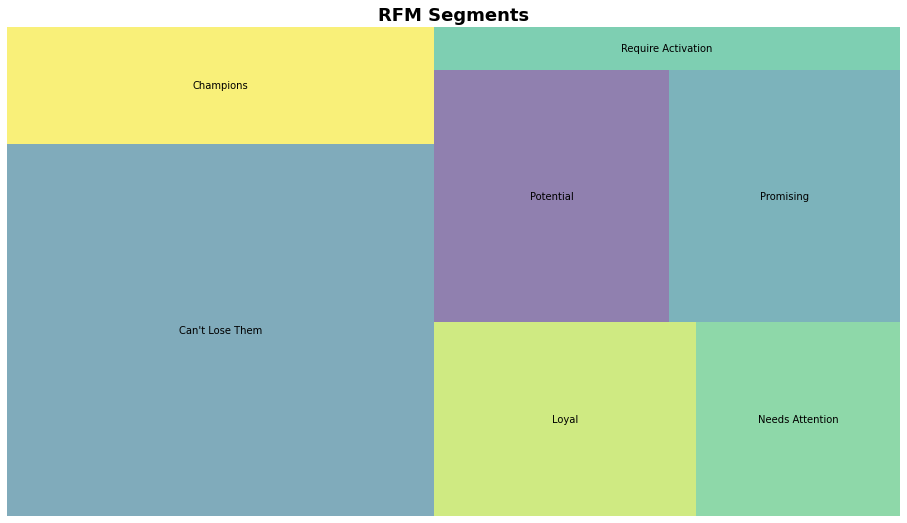

In [61]:
rfm_level_agg.columns = ['recencymean','frequencymean','monetarymean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Can\'t Lose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Feed in dummy sample data to test which segment they belong to


In [64]:
df_test = pd.DataFrame({'recency':[24,136,278,699,1988],'overall_frequency':[1,2,4,6,18],'overall_monetary':[788,244,200,1768,1345]})

In [65]:
df_test

recency  overall_frequency  overall_monetary
0       24                  1               788
1      136                  2               244
2      278                  4               200
3      699                  6              1768
4     1988                 18              1345

In [66]:
# Define function for RFM approach
def RFM(df):
    # --Calculate R, F and M groups--
    # Create labels for Recency and Frequency
    r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
    # Assign these labels to 4 equal percentile groups 
    r_groups = pd.qcut(df['recency'], q=4, labels=r_labels)
    # Assign these labels to 4 equal percentile groups 
    f_groups = pd.qcut(df['overall_frequency'], q=4, labels=f_labels)
    # Create new columns R and F 
    df_process = df.assign(R = r_groups.values, F = f_groups.values)
    # Create labels for MonetaryValue
    # Assign these labels to three equal percentile groups 
    m_groups = pd.qcut(df['overall_monetary'], q=4, labels=m_labels)
    # Create new column M
    df_process = df_process.assign(M = m_groups.values)
    rfm = df_process
    # Calculate RFM_Score
    rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
    # Define rfm_level function
    # Create a new variable RFM_Level
    rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
    return rfm['RFM_Level']

Predicted results for the five test users

In [67]:
RFM(df_test)

0              Loyal
1          Potential
2          Potential
3    Can't Lose Them
4          Champions
Name: RFM_Level, dtype: object

### Recommendations

In order to maximize our budget usage, we will alter our promotion strategy based on the characteristics of each identified segment. Each segment (*'Can't Lose Them','Champions','Loyal','Needs Attention','Potential','Promising','Require Activation'*) should get a unique message, discount and suggested item to purchase that will motivate the customer to add an item to their cart.

Our *Champions* and *Can't Lose Them* customers will only receive weekly/biweekly notification/email/message to remind them to check out our store, or to inform them about new book releases. We will not be spending marketing money on this group, since they do not need monetary incentives to engage with our store. Instead, we will make sure that we recognize their loyalty by providing top-notch customer services and other forms of appreciation.

Our *Loyal* group will periodically receive some discount promotions, in order to make them into *Champions* or *Can't Lose Them* group. This is the group that has the potential to be our top customer, but either has not shopped with us for a while, of not for frequently, or not for big purchases.

Our *'Needs Attention','Potential','Promising'* groups will receive more frequent and/or bigger discount promotions, in an ascending order. These are the groups that would be most likely to be influenced by a discount promotion to shop with us. We will want to spend a lot of marketing money on this group to turn them into loyal customers.

For *Require Activation* group, I think that we need to realize we cannot effectively influence this group anymore. I think spending money on this group would be a unideal use of our budgets, since the amount of money needed to convert them from a churn customer back to a loyal one will be more than what they are worth. Thus, I recommend to skip this group.
